<h2 align="center"> <font color='gray'>dtreeviz</font></h2>
<h3 align="center"> <font color='gray'>Classifier Leaf Info</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> The Python-based dtreeviz library is a visualization tool for decision trees. It allows users to create interactive visualizations of decision trees, which can be used to gain insights into the structure and behavior of these models. Additionally, dtreeviz provides a range of features that enable users to customize their visualizations, making it a powerful tool for data exploration and analysis.
    
The dtreeviz library in Python is compatible with several decision tree libraries, including scikit-learn, XGBoost, TensorFlow.
    
https://explained.ai/decision-tree-viz/    

</div>

<div class="alert alert-block alert-warning">  
<b>Information:</b> Altough the catboost model provided by seznam.cz is essentially suitable for sklearn.DecisionRegressor instance, it is worth mentioning to look at options to visualize a classifier model within the library dtreeviz. Therefore a sklearn.DecisionTreeClassifier instance is trained by validation data from seznam.cz to provide classifier visualizations we can inspire of. 
</div>

<div class="alert alert-block alert-success">  
<b>Description:</b> There are several functions for leaf-information visualization ofthe given model in the dtreeviz library which we can see bellow. Altough these graphs do not have a tree structure, they are worth mentioning.
</div>

In [1]:
import sys
sys.path.append('../../../utils')
import data_funcs as utils

In [2]:
X,y,features = utils.get_validation_data('../../../data/validation-set.tsv')

<h3 align="center"> <font color='gray'>Creating the sklearn.DecisionTreeClassifier Instance</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> Since the library dtreeviz is compatible with decision trees from skicit-learn, we will use self-trained instance from this library.
</div>

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X,y);

<div class="alert alert-block alert-warning">  
<b>Information:</b> For further visualizations fit() function to the model needs to be runned.
</div>

<h3 align="center"> <font color='gray'>Creating the dtreeviz Shadow Tree Wrapping the sklearn.DecisionTreeClassifier</font></h3>

<div class="alert alert-block alert-success">  
<b>Description:</b> 'The decision trees for classifiers and regressors from scikit-learnare built for efficiency, not necessarily ease of tree walking or extracting node information. We created dtreeviz.shadow.ShadowDecTree and dtreeviz.shadow.ShadowDecTreeNode classes as an easy-to-use (traditional binary tree) wrapper for all tree information. Here's how to create a shadow tree from a scikit classifier or regressor tree model:
    
shadow_tree = ShadowDecTree(tree_model, X_train, y_train, feature_names, class_names)'
    

https://explained.ai/decision-tree-viz/
</div>

In [5]:
import dtreeviz

In [6]:
viz = dtreeviz.model(clf, X, y,
                target_name="box",
                feature_names=features,
                class_names=["0", "1"])

<h3 align="center"> <font color='gray'>Leaf Sizes Visualization</font></h3>

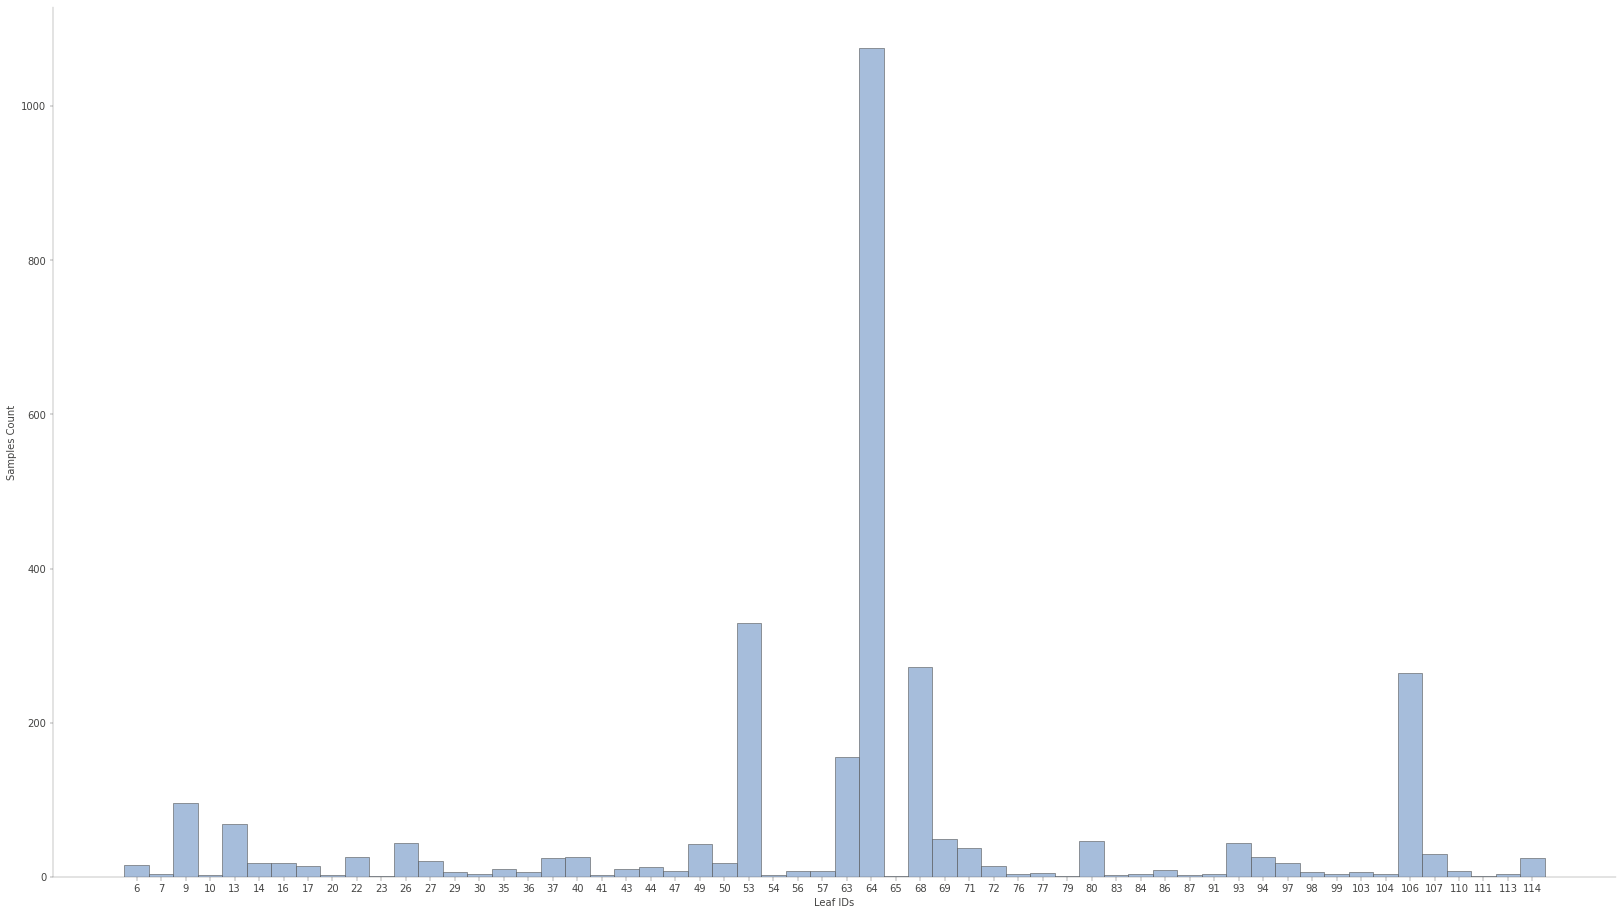

In [8]:
viz.leaf_sizes(figsize=(28,16))

<h3 align="center"> <font color='gray'>Leaf Distributions Visualization</font></h3>

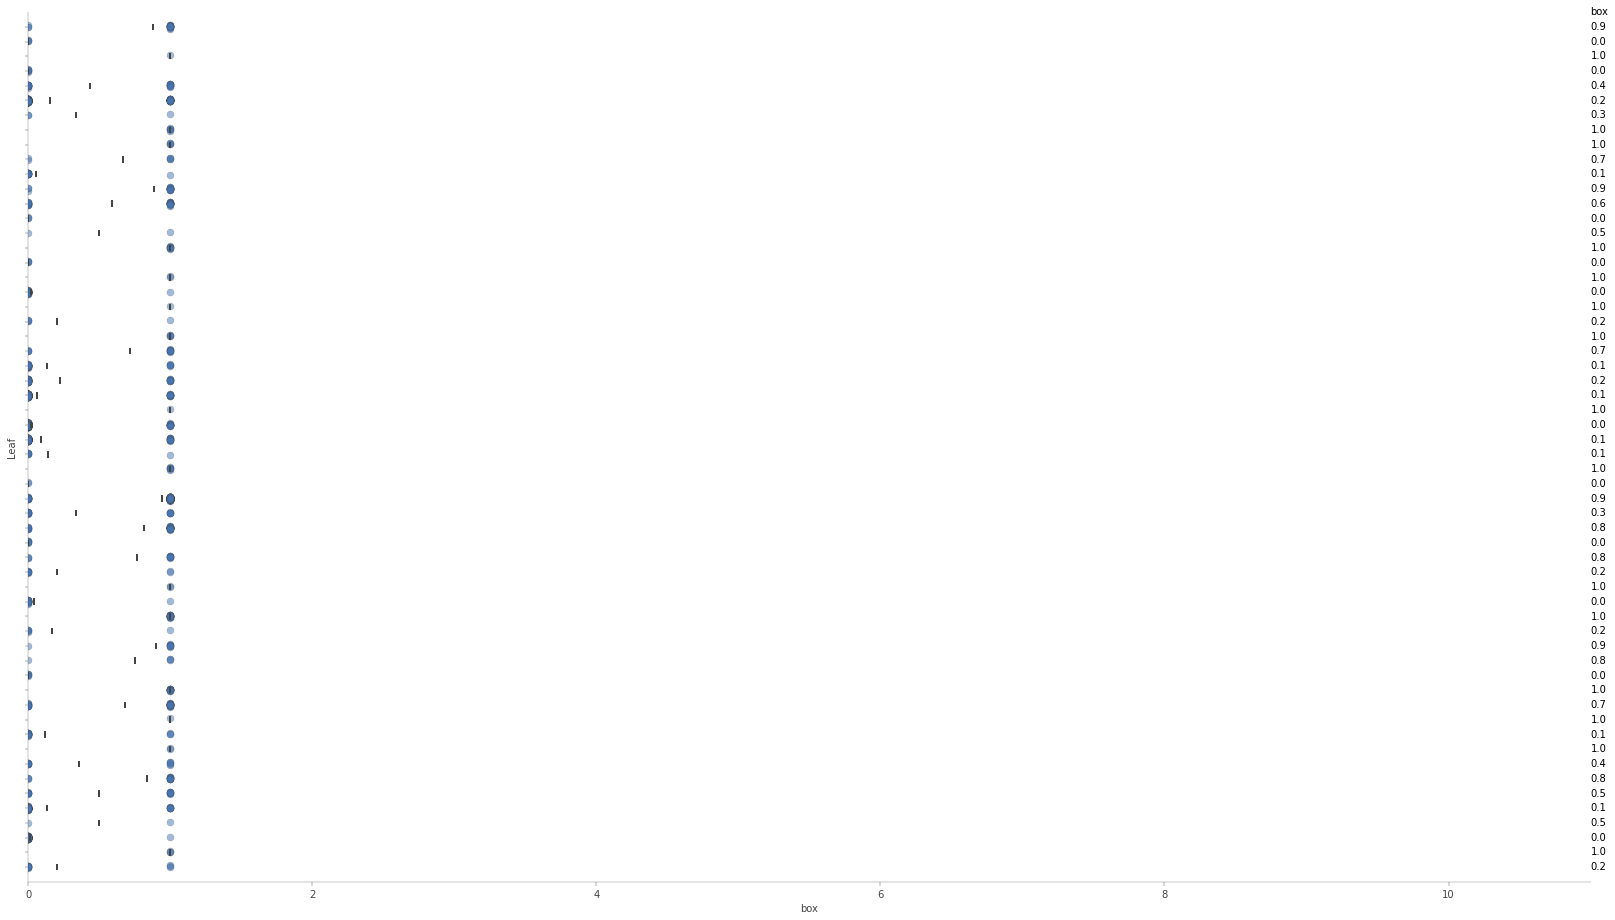

In [9]:
viz.rtree_leaf_distributions(figsize=(28,16))

<div class="alert alert-block alert-success">  
<b>Description</b> Visualization of leaf target distributions which is in the context of seznam.cz model data (exact target data - 0/1) less useful.
</div>

<h3 align="center"> <font color='gray'>Leaf Purity Visualization</font></h3>

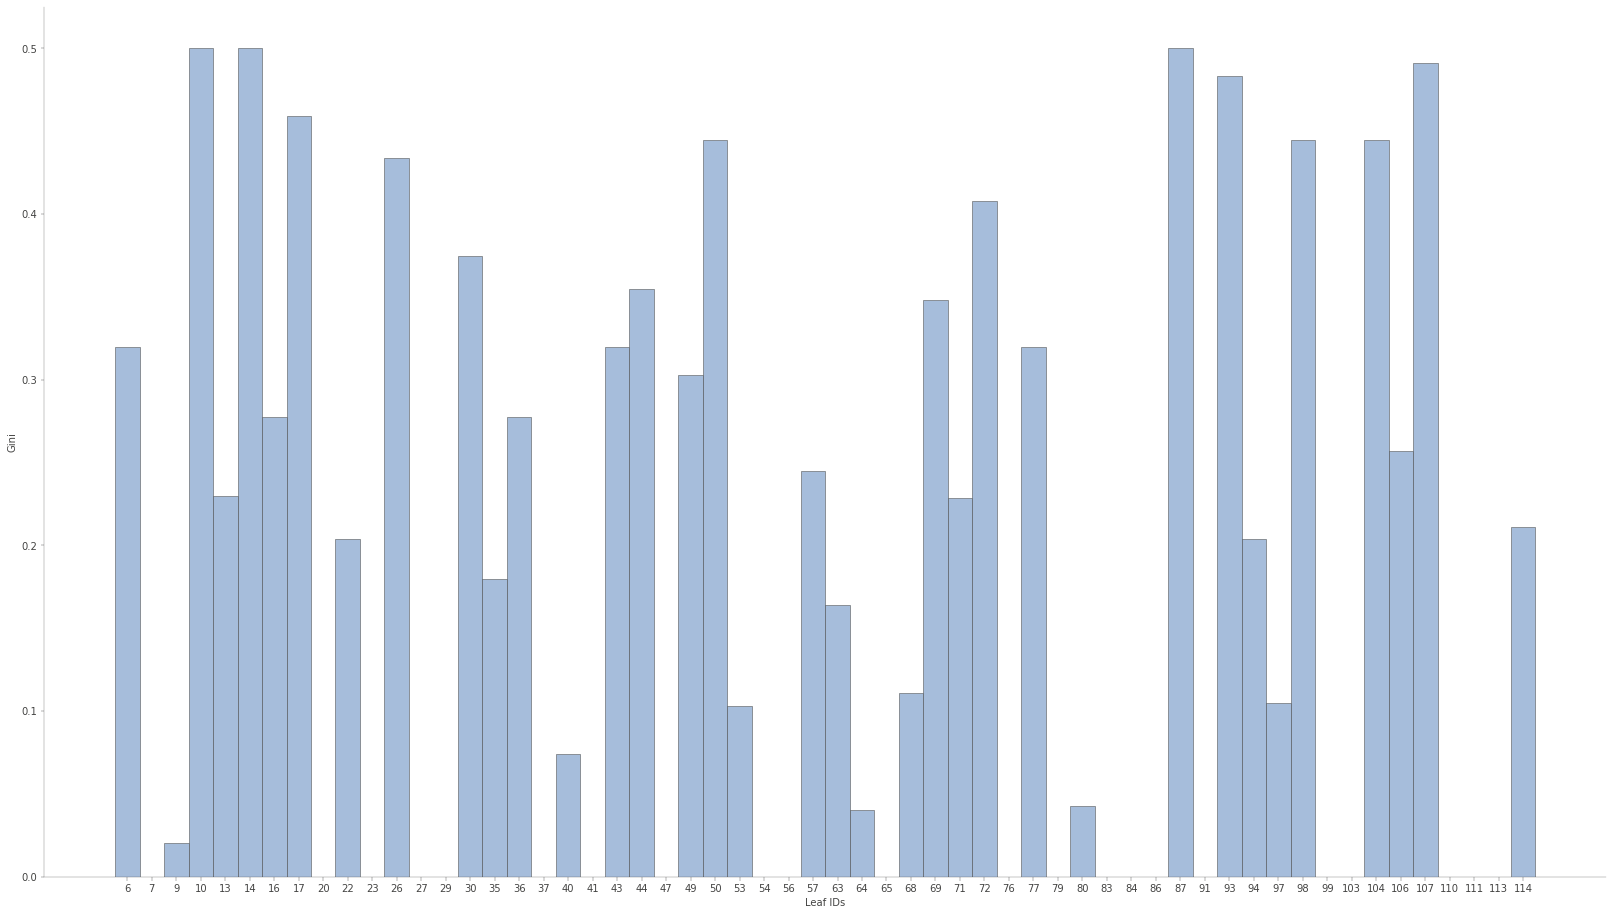

In [10]:
viz.leaf_purity(figsize=(28,16))

<div class="alert alert-block alert-success">  
<b>Description</b> Visualization of leaves criterion/purities.
    
The most common criterion/purity for tree regressors is “mse”, “friedman_mse”, “mae” and for tree classifers are
        "gini" and "entropy". This information shows the leaf performance/confidence for its predictions, namely how pure or
        impure are the samples from each leaf. Each leaf performance, in the end, will determine the general tree performance.
    
This visualisation can be used together with leaf_sizes() for a better leaf interpretation. For example,
        a leaf with good confidence, but few samples, can be a sign of overfitting. The best scenario would be to have a
        leaf with good confidence and also a lot of samples.
</div>